<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-librairies" data-toc-modified-id="Import-des-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies</a></span></li><li><span><a href="#Lecture-des-données" data-toc-modified-id="Lecture-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lecture des données</a></span></li><li><span><a href="#Valeurs-aberrantes" data-toc-modified-id="Valeurs-aberrantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Valeurs aberrantes</a></span></li><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kmeans</a></span><ul class="toc-item"><li><span><a href="#Choisir-le-nombre-approprié-de-clusters" data-toc-modified-id="Choisir-le-nombre-approprié-de-clusters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Choisir le nombre approprié de clusters</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Essai-avec-Yellowbrick" data-toc-modified-id="Essai-avec-Yellowbrick-4.1.0.1"><span class="toc-item-num">4.1.0.1&nbsp;&nbsp;</span>Essai avec Yellowbrick</a></span></li></ul></li><li><span><a href="#Coefficients-de-silhouette" data-toc-modified-id="Coefficients-de-silhouette-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Coefficients de silhouette</a></span><ul class="toc-item"><li><span><a href="#Essai-avec-Yellowbrick" data-toc-modified-id="Essai-avec-Yellowbrick-4.1.1.1"><span class="toc-item-num">4.1.1.1&nbsp;&nbsp;</span>Essai avec Yellowbrick</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-4.1.1.2"><span class="toc-item-num">4.1.1.2&nbsp;&nbsp;</span>Visualisation</a></span></li></ul></li><li><span><a href="#Davies-Bouldin" data-toc-modified-id="Davies-Bouldin-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Davies-Bouldin</a></span></li></ul></li><li><span><a href="#Distance-intercluster" data-toc-modified-id="Distance-intercluster-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Distance intercluster</a></span></li></ul></li><li><span><a href="#Stabilité-des-clusters-dans-le-temps" data-toc-modified-id="Stabilité-des-clusters-dans-le-temps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stabilité des clusters dans le temps</a></span></li><li><span><a href="#KModes" data-toc-modified-id="KModes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>KModes</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>DBSCAN</a></span><ul class="toc-item"><li><span><a href="#Visualisation-avant-tuning" data-toc-modified-id="Visualisation-avant-tuning-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Visualisation avant tuning</a></span></li><li><span><a href="#Recherche-des-meilleurs-paramètres" data-toc-modified-id="Recherche-des-meilleurs-paramètres-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Recherche des meilleurs paramètres</a></span></li><li><span><a href="#Visualisation-après-tuning" data-toc-modified-id="Visualisation-après-tuning-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Visualisation après tuning</a></span></li></ul></li></ul></div>

## Import des librairies

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import decomposition
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from kneed import KneeLocator

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pcoords import parallel_coordinates

from olist import *

from tqdm.auto import tqdm
tqdm.pandas()

## Lecture des données

supprimer les outliers (monetary)

In [183]:
rfm = pd.read_csv("data/rfm.csv")
rfm = rfm.set_index('customer_unique_id')
rfm

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,1135.20
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
0000f46a3911fa3c0805444483337064,541,1,689.76
0000f6ccb0745a6a4b88665a16c9f078,325,1,174.48
0004aac84e0df4da2b147fca70cf8255,292,1,1181.34
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,1,20674.20
fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58
ffff371b4d645b6ecea244b27531430a,572,1,112.46


## Valeurs aberrantes

In [184]:
rfm.describe()

,recency,frequency,monetary
count,93395.000000,93395.000000,93395.000000
mean,241.740618,1.033406,673.583621
std,153.161518,0.208236,1717.605791
min,0.000000,1.000000,0.000000
25%,118.000000,1.000000,77.110000
50%,222.000000,1.000000,189.160000
75%,351.000000,1.000000,554.900000
max,728.000000,15.000000,75716.300000


e:\documents\p5\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



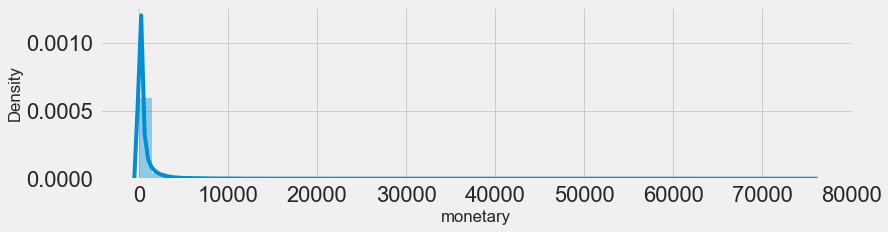

In [185]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'])
plt.show()

In [186]:
Q1 = rfm[["monetary"]].quantile(0.25)
Q3 = rfm[["monetary"]].quantile(0.75)
EI = Q3 - Q1
EI

monetary    477.79
dtype: float64

In [187]:
outliers = (rfm[["monetary"]] < (Q1 - 1.5 * EI)) | \
           (rfm[["monetary"]] > (Q3 + 1.5 * EI))

rfm_with_outliers = rfm.copy()
rfm = rfm[outliers["monetary"] == False]
rfm.describe()

,recency,frequency,monetary
count,81850.000000,81850.000000,81850.000000
mean,240.757153,1.026756,265.002529
std,152.688575,0.175515,279.191683
min,0.000000,1.000000,0.000000
25%,118.000000,1.000000,68.972500
50%,221.000000,1.000000,149.010000
75%,349.000000,1.000000,358.320000
max,728.000000,7.000000,1271.520000


e:\documents\p5\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



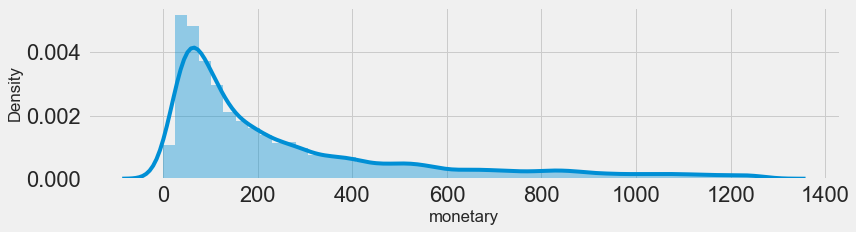

In [188]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'])
plt.show()

In [189]:
df_rfm_sample = rfm.sample(10000, random_state=42)
rfm_with_outliers_sample = rfm_with_outliers.sample(
    10000, random_state=42)

## Kmeans

In [190]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(rfm)
scaled_samples = scaler.fit_transform(df_rfm_sample)

In [191]:
scaled_features[:5]

array([[-0.82362365, -0.15244514,  3.11686501],
       [-0.80397569, -0.15244514, -0.85179465],
       [ 1.96638603, -0.15244514,  1.52139226],
       [ 0.55173323, -0.15244514, -0.32423273],
       [ 0.33560572, -0.15244514,  3.28212882]])

In [192]:
kmeans_params = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=3, **kmeans_params)

In [193]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [194]:
# La valeur SSE la plus faible
kmeans.inertia_

113978.33154625229

In [195]:
# Emplacements finaux du centroïde
kmeans.cluster_centers_

array([[-0.10317291,  5.97004475,  0.58305592],
       [-0.71237591, -0.15244514, -0.0554712 ],
       [ 0.98683837, -0.15244514,  0.04097351]])

In [196]:
# Le nombre d'itérations nécessaires pour converger
kmeans.n_iter_

8

In [197]:
kmeans.labels_[:5]

array([1, 1, 2, 2, 2])

### Choisir le nombre approprié de clusters

In [198]:
# Une liste contient les valeurs SSE pour chaque k
sse = []
for k in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]

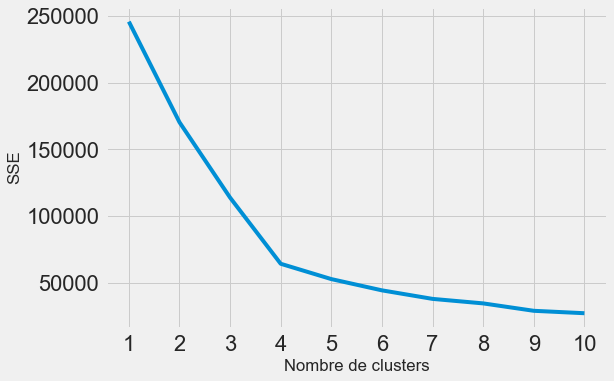

In [199]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de clusters")
plt.ylabel("SSE")
plt.show()

In [200]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

##### Essai avec Yellowbrick

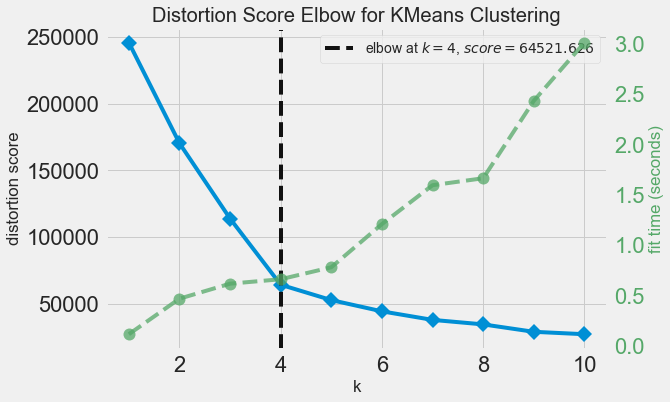

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [201]:
model = KMeans(**kmeans_params)
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(scaled_features)
visualizer.show()

#### Coefficients de silhouette

In [202]:
# # Une liste contient les coefficients de silhouette pour chaque k
# silhouette_coefficients = []

# # Notez que vous commencez à 2 clusters pour le coefficient de silhouette.
# for k in tqdm(range(2, 11)):
#     kmeans = KMeans(n_clusters=k, **kmeans_params)
#     kmeans.fit(scaled_features)
#     score = silhouette_score(scaled_features, kmeans.labels_)
#     silhouette_coefficients.append(score)

In [203]:
# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Nombre de clusters")
# plt.ylabel("Coefficient de Silhouette")
# plt.show()

##### Essai avec Yellowbrick

In [204]:
# from yellowbrick.cluster import intercluster_distance
# # Instanciation du modèle de clustering et du visualiseur

# for n_cluster in tqdm(range(2, 10)):
#     model = KMeans(n_cluster, **kmeans_params)
#     visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#     visualizer.fit(scaled_features)  # Adapter les données au visualiseur
#     visualizer.show()  # afficher la silhouette

##### Visualisation

Le clustering a pris 1s


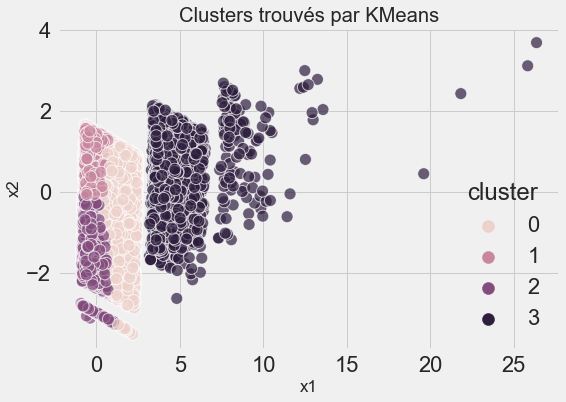

In [205]:
pca_df = pca_clusters(rfm, cluster.KMeans, (), {'n_clusters': 4})

In [206]:
pca_df

#### Davies-Bouldin

L'indice de Davies-Bouldin est une mesure de qualité d'une partition d'un ensemble de données.

C'est la moyenne du rapport maximal entre la distance d'un point au centre de son groupe et la distance entre deux centres de groupes.

L'indice de Davies-Bouldin varie entre 0 (meilleure classification) et ${\textstyle +\infty }$ (pire classification).

In [207]:
davies_index = []

for k in tqdm(range(2, 11)):
    model = KMeans(n_clusters=k, **kmeans_params)
    model.fit(scaled_features)
    labels = model.labels_
    davies_index.append(davies_bouldin_score(rfm, labels))

  0%|          | 0/9 [00:00<?, ?it/s]

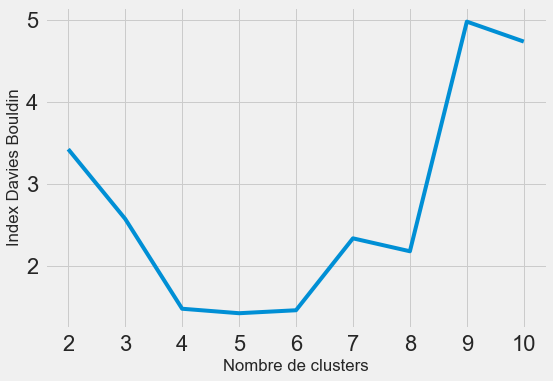

In [208]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), davies_index)
plt.xticks(range(2, 11))
plt.xlabel("Nombre de clusters")
plt.ylabel("Index Davies Bouldin")
plt.show()

### Distance intercluster

  0%|          | 0/8 [00:00<?, ?it/s]

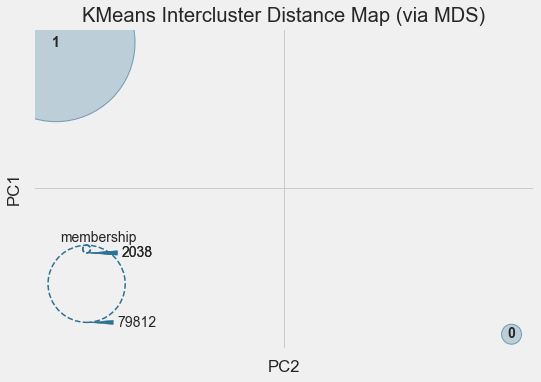

e:\documents\p5\env\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



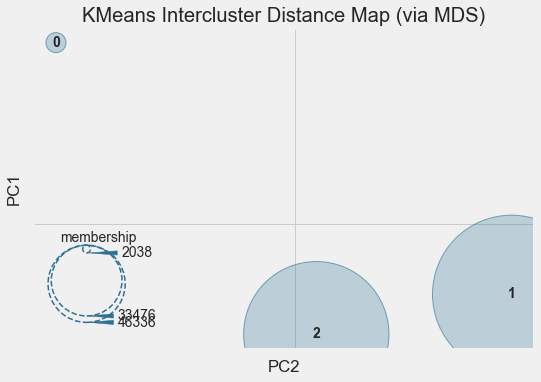

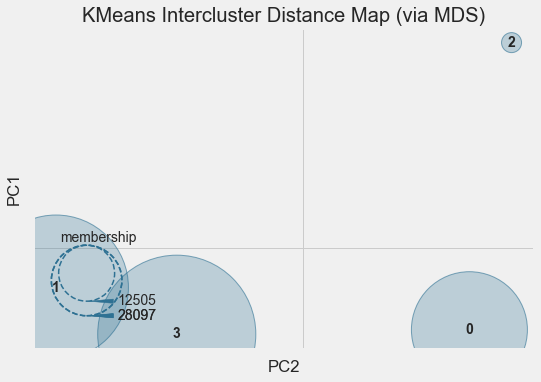

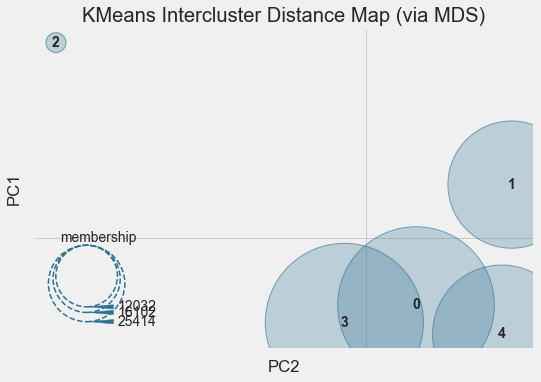

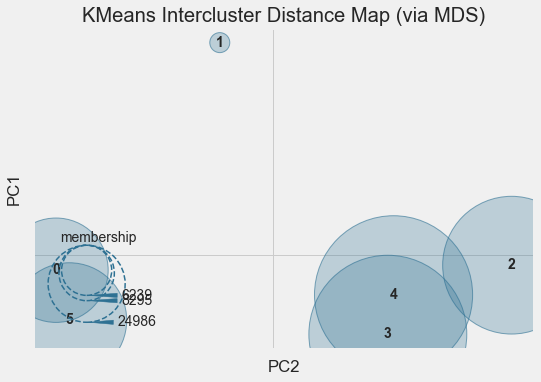

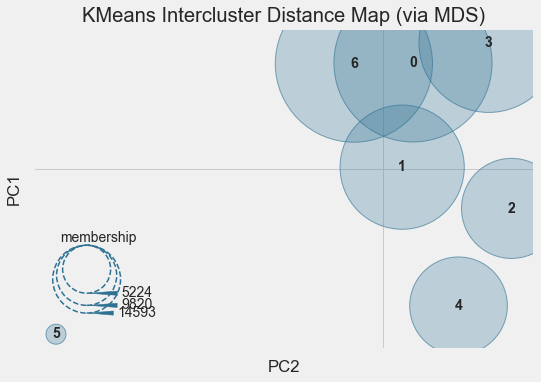

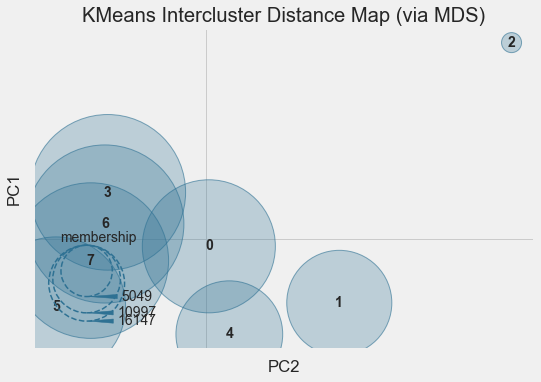

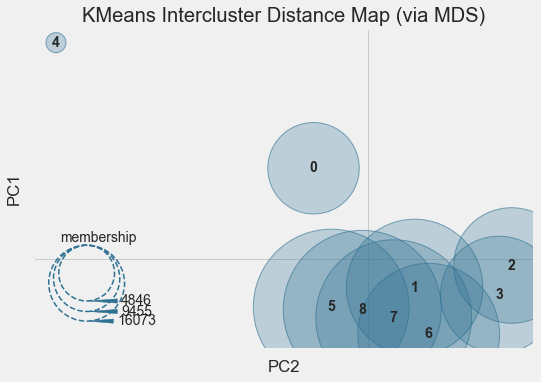

In [209]:
from yellowbrick.cluster import intercluster_distance
# Instanciation du modèle de clustering et du visualiseur

for n_cluster in tqdm(range(2, 10)):
    model = KMeans(n_cluster, **kmeans_params)
    intercluster_distance(model, scaled_features)

## Stabilité des clusters dans le temps

Les valeurs de sortie de l'ARI sont comprises entre -1 et 1. Un score proche de 0 indique des affectations aléatoires, et un score proche de 1 indique des clusters parfaitement étiquetés.

In [234]:
score_ari

[0.9816010338952375,
 0.9670400601358959,
 0.9769128772134237,
 0.9876686652154164,
 0.9492048028016389,
 0.4783219796452765,
 0.4479116947141667,
 0.9757706881960112,
 0.9590649016784197,
 0.9932264641731262,
 0.7889703655406481,
 0.9398336045680686,
 0.9839176596853973]

Text(0.5, 0.98, "Evolution de l'ARI")

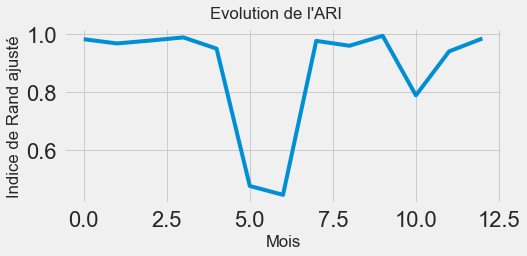

In [233]:
score_ari = kmean_time_stability(rfm, 'recency', 5, ari=True)
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(range(len(score_ari)), score_ari)
plt.xlabel("Mois")
plt.ylabel("Indice de Rand ajusté")
fig.suptitle("Evolution de l'ARI")

Le graphique indique une chute de la stabilité après le 4e mois. Si l’on se base dessus, nous pourrions proposer une maintenance tous les 5 mois.

## KModes

Le clustering KModes est l'un des algorithmes d'apprentissage automatique non supervisé utilisé pour regrouper des variables catégorielles.

Pourquoi KModes alors que nous avons déjà KMeans ?

KMeans utilise des mesures mathématiques (distance) pour regrouper des données continues. Plus la distance est faible, plus nos points de données sont similaires. Les centroïdes sont mis à jour par Means.
Mais pour les points de données catégorielles, nous ne pouvons pas calculer la distance. Nous utilisons donc l'algorithme KModes. Il utilise les dissimilarités (désaccords totaux) entre les points de données. Plus les dissimilarités sont faibles, plus les points de données sont similaires. Il utilise les modes au lieu des moyennes.

In [211]:
from kmodes.kmodes import KModes

In [212]:
olist_data = pd.read_csv("data/combined_data.csv")
olist_data_sample = olist_data.sample(10000, random_state=42)

In [213]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in tqdm(list(K)):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=1)
    kmode.fit_predict(olist_data_sample)
    cost.append(kmode.cost_)

  0%|          | 0/9 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 309244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 309244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 309244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 309244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 309244.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4392, cost: 305301.0
Run 1, iteration: 2/100, moves: 133, cost: 305301.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3567, cost: 305949.0
Run 2, ite

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3988, cost: 294990.0
Run 1, iteration: 2/100, moves: 1133, cost: 294485.0
Run 1, iteration: 3/100, moves: 287, cost: 294430.0
Run 1, iteration: 4/100, moves: 12, cost: 294430.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4685, cost: 294487.0
Run 2, iteration: 2/100, moves: 1301, cost: 294448.0
Run 2, iteration: 3/100, moves: 23, cost: 294443.0
Run 2, iteration: 4/100, moves: 1, cost: 294443.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5365, cost: 294360.0
Run 3, iteration: 2/100, moves: 1209, cost: 294161.0
Run 3, iteration: 3/100, moves: 79, cost: 294161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4786, cost: 295136.0
Run 4, iteration: 2/100, moves: 877, cost: 294900.0
Ru

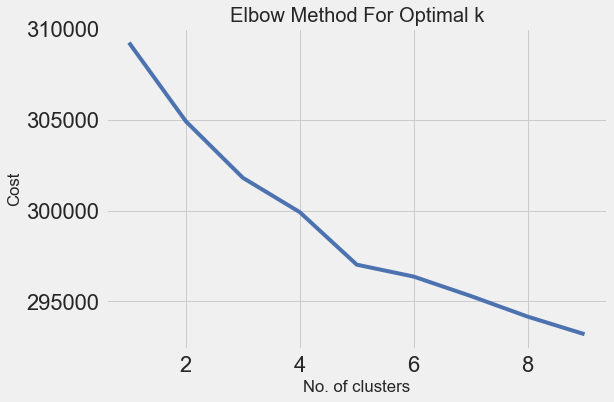

In [214]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

https://www.kaggle.com/teejmahal20/clustering-categorical-data-k-modes-cat-ii

## DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


Les points forts des méthodes de clustering basées sur la densité sont les suivants :

- Elles excellent dans l’identification de clusters de formes non sphériques.


- Elles sont résistantes aux valeurs aberrantes.


Les faiblesses des méthodes de clustering basées sur la densité sont les suivantes :

- Elles ne sont pas bien adaptées au clustering dans des espaces à haute dimension.


- Elles ont des difficultés à identifier des clusters de densités variables.

### Visualisation avant tuning

Le clustering a pris 1s


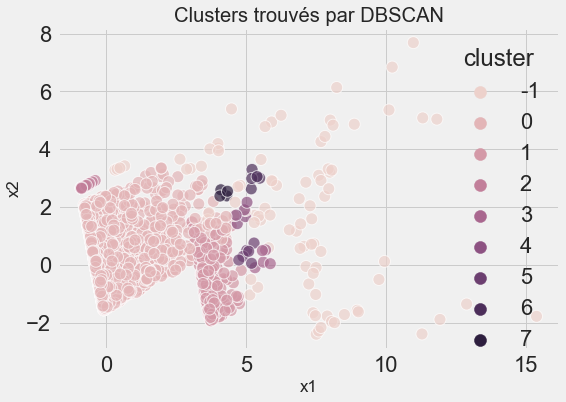

In [215]:
pca_clusters(rfm_with_outliers_sample, cluster.DBSCAN, (), {})

### Recherche des meilleurs paramètres

In [216]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(scaled_samples)
distances, indices = neighbors_fit.kneighbors(scaled_samples)

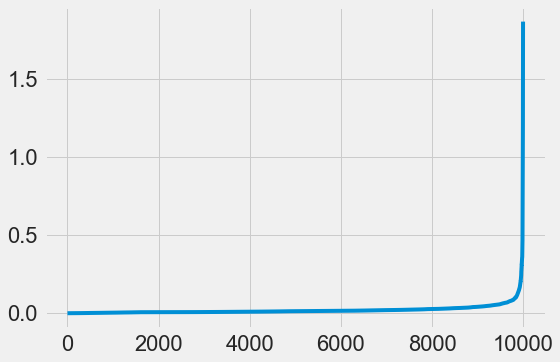

In [217]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

(9990.0, 10000.0)

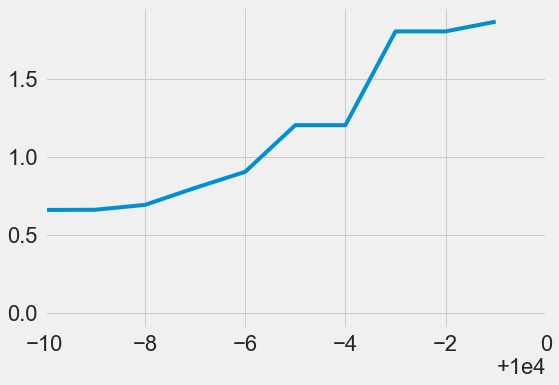

In [218]:
plt.plot(distances)
plt.xlim([9990, 10000])

### Visualisation après tuning

Paramètres de DBSCAN :


- eps : Distance maximale entre deux échantillons pour que l'un soit considéré comme étant dans le voisinage de l'autre.


- min_samples : Le nombre d'échantillons (ou le poids total) dans un voisinage pour qu'un point soit considéré comme un point central. Cela inclut le point lui-même.


- n_jobs : Le nombre de process en parallèles à exécuter. -1 signifie utiliser tous les processeurs.

Le clustering a pris 1s


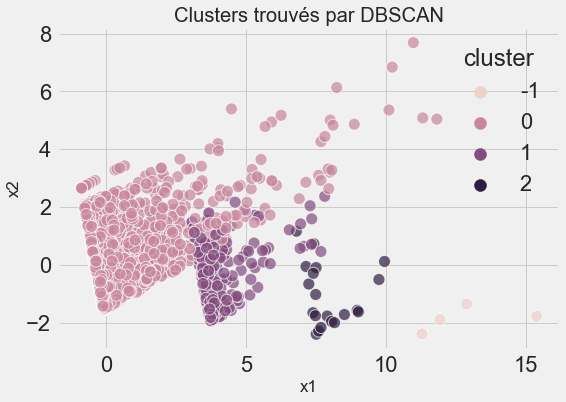

In [224]:
pca_clusters(rfm_with_outliers_sample, cluster.DBSCAN, (), {
    'eps': 5,
    'min_samples': 6,
    'n_jobs': -1
})